In [118]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/enigma-tech-tatva-2022/sample_submission.csv
/kaggle/input/enigma-tech-tatva-2022/train.csv
/kaggle/input/enigma-tech-tatva-2022/test.csv


In [119]:
df=pd.read_csv('../input/enigma-tech-tatva-2022/train.csv')
df.shape

(12000, 10)

In [120]:
df.head()


,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.544971,Ideal,E,SI1,63.911017,52.575829,5.447452,4.053076,3.701485,3.558
1,2.073682,Premium,J,SI1,67.642925,57.660288,6.266665,7.661507,6.177051,24.738
2,0.606198,Premium,G,VS1,55.617310,60.388787,6.800151,5.096966,3.480326,3.630
3,0.695397,Premium,G,SI2,60.587811,71.325721,5.366931,6.616767,4.454435,4.218
4,0.282651,Ideal,E,VVS2,68.970056,54.372123,4.920104,4.409408,4.361358,1.578


In [121]:
df_dtype=df.dtypes
df_missing=df.isna().mean().round(4)*100
df_desc = df.describe(include='all')
dtls_1=pd.DataFrame(df_missing, columns=['missing'])
dtls_2=pd.DataFrame(df_dtype, columns=['dtype'])
dtls_3=pd.DataFrame(df_desc)
dtls_3=dtls_3.T
dtls=pd.concat([dtls_1, dtls_2, dtls_3], axis=1)
dtls.sort_values(by='missing', ascending=False)

,missing,dtype,count,unique,top,freq,mean,std,min,25%,50%,75%,max
carat,0.0,float64,12000.0,NaN,NaN,NaN,0.795368,0.485184,0.020265,0.405042,0.684387,1.074885,4.445496
cut,0.0,object,12000,5,Ideal,4862,NaN,NaN,NaN,NaN,NaN,NaN,NaN
color,0.0,object,12000,7,G,2566,NaN,NaN,NaN,NaN,NaN,NaN,NaN
clarity,0.0,object,12000,8,SI1,2960,NaN,NaN,NaN,NaN,NaN,NaN,NaN
depth,0.0,float64,12000.0,NaN,NaN,NaN,61.72008,5.160848,39.768041,58.227008,61.720635,65.219405,81.160537
table,0.0,float64,12000.0,NaN,NaN,NaN,57.490596,5.473837,36.987798,53.812489,57.388137,61.172691,84.895276
x,0.0,float64,12000.0,NaN,NaN,NaN,5.731005,1.492658,0.031002,4.659935,5.681654,6.747104,11.133427
y,0.0,float64,12000.0,NaN,NaN,NaN,5.716316,1.503996,0.307422,4.631587,5.678285,6.73853,11.205688
z,0.0,float64,12000.0,NaN,NaN,NaN,3.528779,1.21639,0.006598,2.684302,3.508792,4.361609,7.983576
price,0.0,float64,12000.0,NaN,NaN,NaN,7.846779,8.000676,0.652,1.886,4.734,10.73,37.608


In [122]:
df['depth'].fillna(df['depth'].mean(), inplace=True)


In [123]:
print(f'before removing duplicates{df.shape}')
df.drop_duplicates(inplace=True)
print(f'after removing duplicates{df.shape}')


before removing duplicates(12000, 10)
after removing duplicates(12000, 10)


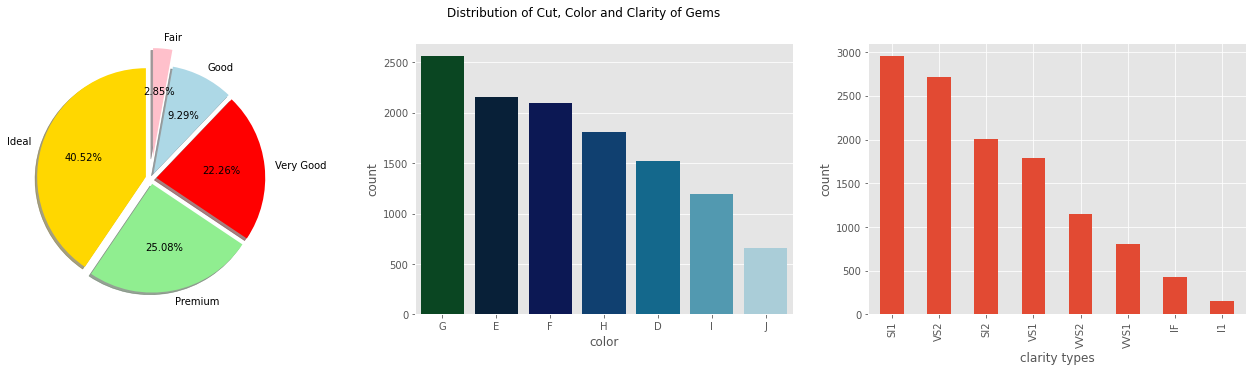

In [124]:
plt.rcParams['figure.figsize']=23,5
plt.subplot(131)
plt.pie(df['cut'].value_counts().values,
        labels=df['cut'].value_counts().index,
        startangle=90,
        colors=['gold', 'lightgreen', 'red', 'lightblue', 'pink'],
        explode=[0.05,0.05,0.05,0.05,0.2],
        shadow=True, autopct='%1.2f%%')
plt.subplot(132)
sns.countplot(df['color'], palette='ocean', order=df['color'].value_counts().index)

plt.subplot(133)
df["clarity"].value_counts().plot.bar()
plt.xlabel('clarity types')
plt.ylabel('count')


plt.suptitle('Distribution of Cut, Color and Clarity of Gems')
plt.show()

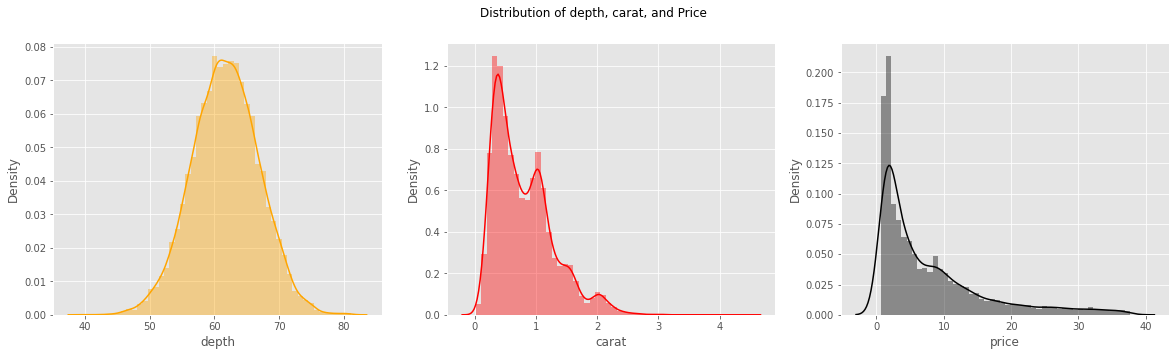

In [125]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.distplot(df['depth'], color='orange')

plt.subplot(132)
sns.distplot(df['carat'], color='red')

plt.subplot(133)
sns.distplot(df['price'], color='black')

plt.suptitle('Distribution of depth, carat, and Price')
plt.show()


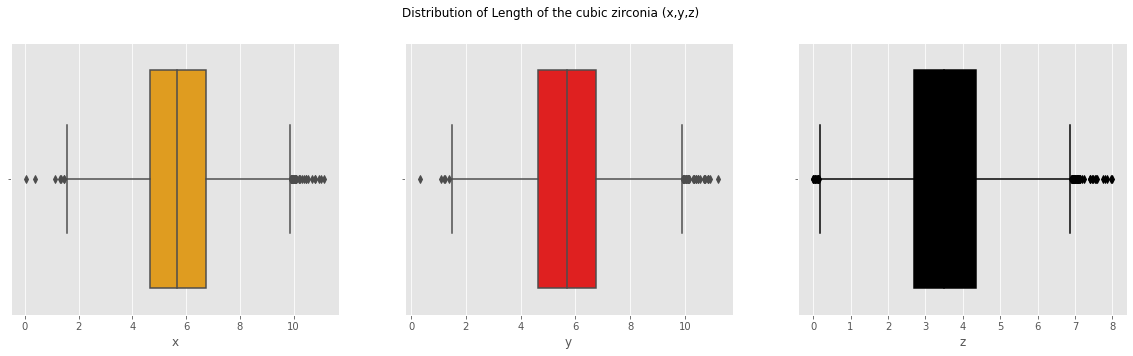

In [126]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.boxplot(df['x'], color='orange')

plt.subplot(132)
sns.boxplot(df['y'], color='red')

plt.subplot(133)
sns.boxplot(df['z'], color='black')

plt.suptitle('Distribution of Length of the cubic zirconia (x,y,z)')
plt.show()

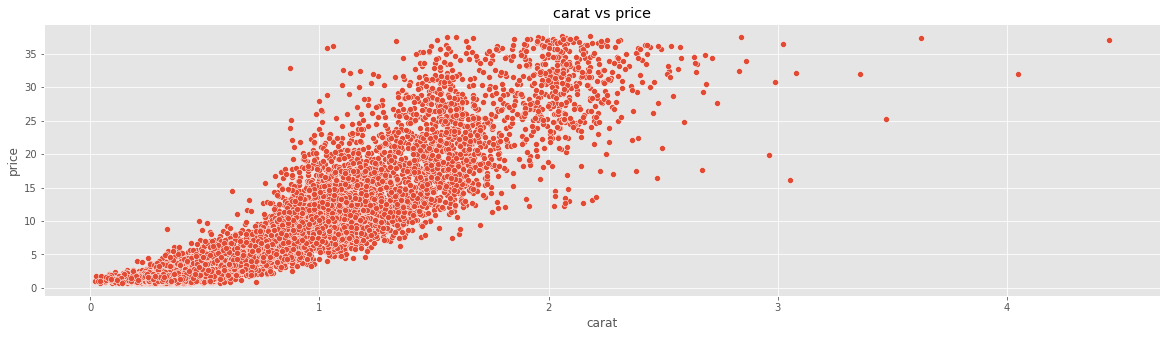

In [127]:
import plotly.express as px
sns.scatterplot(df['carat'], df['price'])
plt.title('carat vs price')
plt.show()


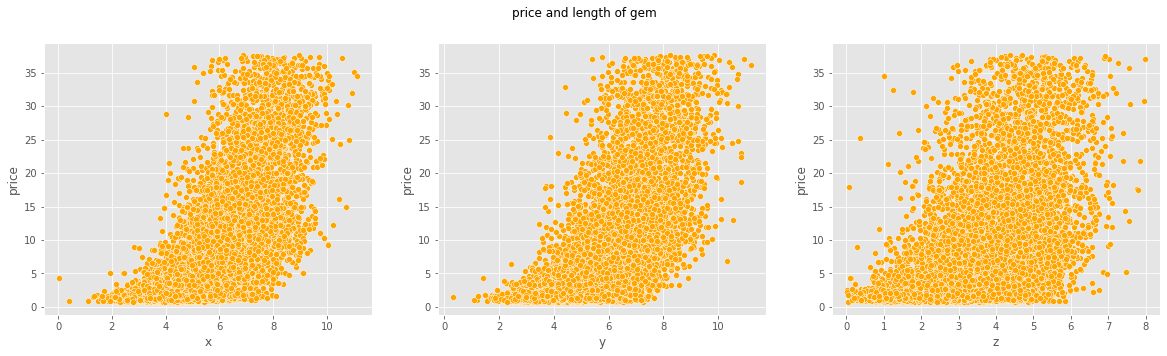

In [128]:
plt.rcParams['figure.figsize']=20,5
plt.subplot(131)
sns.scatterplot(df['x'], df['price'], color='orange')

plt.subplot(132)
sns.scatterplot(df['y'], df['price'], color='orange')

plt.subplot(133)
sns.scatterplot(df['z'], df['price'], color='orange')

plt.suptitle('price and length of gem')
plt.show()

In [129]:
df=df[~((df['x']==0)|(df['y']==0)|(df['z']==0))]


In [130]:
df['y'].values[df['y'].values>10]=df['y'].mode()[0]
df['z'].values[df['z'].values>8]=df['z'].mode()[0]


<AxesSubplot:xlabel='clarity', ylabel='price'>

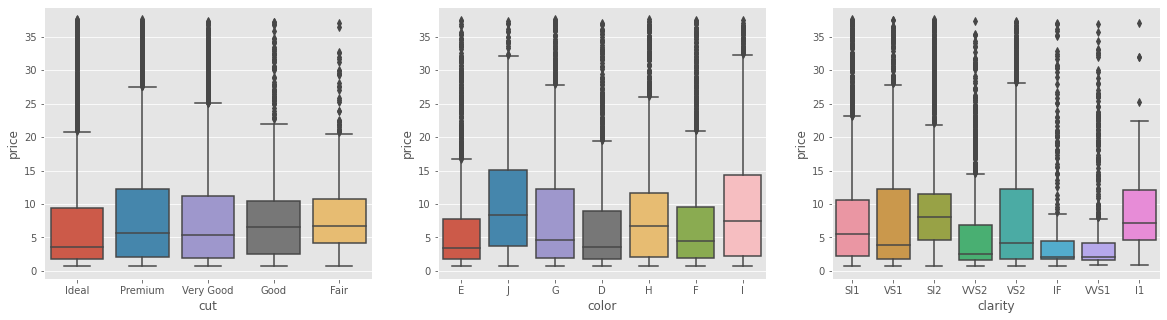

In [131]:
plt.subplot(131)
sns.boxplot(df['cut'], df['price'])

plt.subplot(132)
sns.boxplot(df['color'], df['price'])

plt.subplot(133)
sns.boxplot(df['clarity'], df['price'])


In [132]:
df[['price', 'cut']].groupby(['cut']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')


In [133]:
df[['price', 'color']].groupby(['color']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')


In [134]:
df[['price', 'clarity']].groupby(['clarity']).agg(['min', 'mean', 'max']).style.background_gradient(cmap='Wistia')


In [135]:
df['cut']=df['cut'].replace(('Fair', 'Good', 'Very Good', 'Premium', 'Ideal'), (1,2,3,4,5))


In [136]:
colors_dummies=pd.get_dummies(df['color'], drop_first=True)
clarity_dummies=pd.get_dummies(df['clarity'], drop_first=True)


In [137]:
dummies=pd.concat([colors_dummies, clarity_dummies], axis=1)


In [138]:
df=pd.concat([df, dummies], axis=1)


In [139]:
df.drop(['color', 'clarity'], axis=1, inplace=True)


<AxesSubplot:>

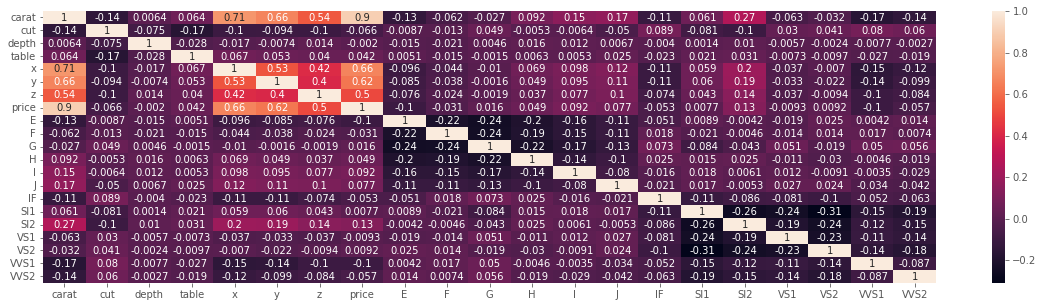

In [140]:
sns.heatmap(df.corr(), annot=True)


In [141]:
df.drop(['x', 'y', 'z'], axis=1, inplace=True)


In [142]:
from lightgbm import LGBMRegressor
from sklearn.model_selection import train_test_split

In [143]:
x=df.drop('price', axis=1)
y=df['price']
X_train, X_test, y_train, y_test=train_test_split(x, y, test_size=0.2, random_state=10)
model=LGBMRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [144]:
model.score(X_test, y_test)


0.9342205822368667

In [145]:
df1 = pd.read_csv('/kaggle/input/enigma-tech-tatva-2022/test.csv')
df1.head()



,carat,cut,color,clarity,depth,table,x,y,z
0,0.136542,Ideal,E,VVS1,53.580195,50.662146,5.078804,1.893405,0.283778
1,0.528934,Ideal,H,VVS1,56.039564,58.315195,6.901560,4.694186,3.803880
2,0.818501,Very Good,I,VS1,58.287214,58.878251,5.282745,5.514879,4.377075
3,1.411504,Premium,H,SI1,63.240206,61.764862,6.863968,9.117281,5.220630
4,1.052036,Fair,J,SI2,46.715415,66.960371,6.725186,4.191414,3.642572


In [146]:
df1['cut']=df1['cut'].replace(('Fair', 'Good', 'Very Good', 'Premium', 'Ideal'), (1,2,3,4,5))

In [147]:
colors_dummies=pd.get_dummies(df1['color'], drop_first=True)
clarity_dummies=pd.get_dummies(df1['clarity'], drop_first=True)


In [148]:
dummies=pd.concat([colors_dummies, clarity_dummies], axis=1)
df1=pd.concat([df1, dummies], axis=1)

In [149]:
df1.drop(['color', 'clarity'], axis=1, inplace=True)


In [150]:
df1.drop(['x', 'y', 'z'], axis=1, inplace=True)


<AxesSubplot:>

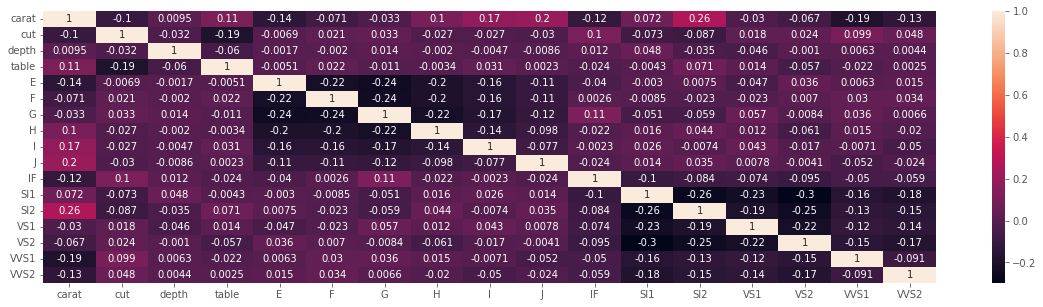

In [151]:
sns.heatmap(df1.corr(), annot=True)


In [152]:

test_x = df1
y_test_pred = model.predict(test_x)
model.score(test_x,y_test_pred)
prediction = pd.DataFrame(y_test_pred, columns=['price']).to_csv('lgbm.csv')